In [41]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Task One
To figure out the values of alpha and beta in y = alpha(x) + beta:
1. Find the mean values of xi and yi
2. To find alpha, sum each value of xi - x_mean, then multiply this by the sum of each value of yi - y_mean
3. Divide this result by the sum of (xi - x_mean)squared. This results in alpha.
4. To find beta, minus alpha*(x_mean) from the mean of y.
5. You now have both alpha and beta for the equation y = alpha*(x) + beta

## Task Two

In [43]:
df = pd.DataFrame({
    'x': [5,6,8],
    'y': [20,22,33]
})
df

,x,y
0,5,20
1,6,22
2,8,33


In [44]:
mean_of_x = (5+6+8)/3
mean_of_y = (20+22+33)/3
print(mean_of_x)
print(mean_of_y)

6.333333333333333
25.0


Now to find alpha using step 2

In [45]:
x_y_sums = ((5 - mean_of_x)*(20 - mean_of_y)) + ((6 - mean_of_x)*(22 - mean_of_y)) + ((8 - mean_of_x)*(33 - mean_of_y))
print(x_y_sums)

xs_squared = ((5 - mean_of_x)**2 + (6 - mean_of_x)**2 + (8 - mean_of_x)**2)
print(xs_squared)

alpha = x_y_sums/xs_squared
print(alpha)


21.0
4.666666666666666
4.500000000000001


Here is a more automated version of above

In [46]:
df['x'] = x
df['y'] = y

top = 0
bot = 0

for i in range(len(df['x'])):
    top += (x[i] - mean_of_x)*(y[i] - mean_of_y)
    bot += (x[i] - mean_of_x)**2
print(top)
print(bot)
print(top/bot)

21.0
4.666666666666666
4.500000000000001


To find beta, we multiply alpha by mean_of_x and take the result away from mean_of_y 

In [47]:
beta = mean_of_y - (alpha*mean_of_x)
print(beta)

-3.5000000000000036


Now we have both alpha and beta, we can put them into our linear equation:\
y = 4.50*(x) + (-3.50)


Here, 4.50 is the slope of the line and -3.50 is the y-intercept. If x is 0, y = -3.50 and for every value that x increases, y increases by 4.50. 

## Task Three and Four
Now I will use a larger dataset and follow the same method but with more python-like language and then try and plot the results on a graph with the line.

In [48]:
df = pd.DataFrame({
    'x': [5,6,8,10,12,13,15],
    'y': [20,22,33,30,28,34,40]
}) 
df

,x,y
0,5,20
1,6,22
2,8,33
3,10,30
4,12,28
5,13,34
6,15,40


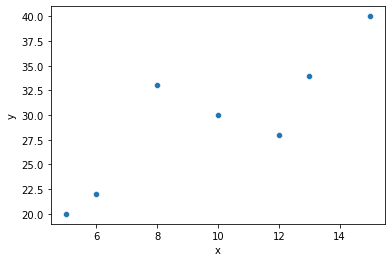

In [49]:
sns.scatterplot(data=df, x='x', y='y')
plt.show()

In [50]:
x = df.x
y = df.y

In [51]:
x_mean = np.mean(x)
y_mean = np.mean(y)
print(x_mean, y_mean)

9.857142857142858 29.571428571428573


In [52]:
top = 0
bot = 0

for i in range(len(x)):
    top += (x[i] - x_mean)*(y[i] - y_mean)
    bot += (x[i] - x_mean)**2

alpha = top/bot
alpha

1.612068965517241

beta = y_mean - alpha*(x_mean)

In [53]:
beta = y_mean - alpha*x_mean
beta

13.681034482758625

y = alpha*(x) + beta\
Here I insert the minimum and maximum x values from my data into the equation to get the corresponding y values. 

In [54]:
five = (alpha*5) + beta
fifteen = (alpha*15) + beta
print(five)
print(fifteen)

21.741379310344833
37.86206896551724


The resulting graph with the line of best fit. Using this we can now estimate values along the line.

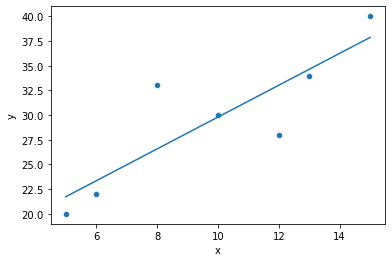

In [55]:
sns.scatterplot(data=df, x='x', y='y')
plt.plot([5,15],[21.741, 37.862])
plt.show()